In [3]:
from pycocotools.coco import COCO
from pycocotools import mask as cocomask

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import os
import sys
import json


In [4]:
from pathlib import Path
       
tr_root = Path('/home/marcosmejia/UB/food_dataset')
tr_original_ann = tr_root / 'train-v0.4/train/annotations.json'
val_original_ann = tr_root / 'val-v0.4/val/annotations.json'


(PosixPath('/home/marcosmejia/UB/food_dataset/train-v0.4/train/annotations.json'),
 PosixPath('/home/marcosmejia/UB/food_dataset/val-v0.4/val/annotations.json'),
 PosixPath('/home/marcosmejia/UB/food_dataset/train-v0.4/train/new_annotations.json'),
 PosixPath('/home/marcosmejia/UB/food_dataset/val-v0.4/val/new_annotations.json'))

In [5]:
with open(tr_original_ann,'r') as f:
    tr_data = json.load(f)

with open(val_original_ann,'r') as f:
    val_data = json.load(f)

val_data.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [6]:
val_data['annotations'][0]

{'id': 123849,
 'image_id': 81931,
 'category_id': 25,
 'segmentation': [[559.0,
   185.24999999999997,
   429.0,
   164.125,
   372.125,
   255.125,
   443.625,
   342.875,
   479.37500000000006,
   360.75000000000006,
   446.875,
   381.875,
   424.125,
   422.5,
   404.62500000000006,
   451.74999999999994,
   401.37500000000006,
   505.375,
   451.74999999999994,
   510.25,
   510.25,
   510.25,
   552.5,
   520.0,
   562.25,
   567.125,
   617.5,
   624.0,
   627.25,
   617.5,
   635.375,
   469.625,
   632.125,
   355.875,
   620.75,
   224.24999999999997,
   620.75,
   199.875,
   581.75,
   190.125]],
 'area': 77365.0,
 'bbox': [372.125, 164.125, 263.25, 459.875],
 'iscrowd': 0}

In [7]:
val_data['images'][0]

{'id': 81931, 'file_name': '081931.jpg', 'width': 650, 'height': 650}

In [8]:
all_images = {}
for image in val_data['images']:
    all_images[image['id']] = {'image_info': image, 'annotations': [] , 'num_ann': 0 }
    
for image in tr_data['images']:
    all_images[image['id']] = {'image_info': image, 'annotations': [] , 'num_ann': 0 }

In [9]:
annotations = val_data['annotations'] + tr_data['annotations']
annotations = sorted(annotations, key = lambda x : x['image_id'])


In [10]:
for annotation in annotations:
    all_images[annotation['image_id']]['annotations'].append(annotation) 
    all_images[annotation['image_id']]['num_ann'] += 1

In [11]:
dict_to_df = {}
for key, info in all_images.items():   
    dict_to_df[key] = [ ann['category_id'] for ann in info['annotations']]

In [12]:
count_cats = {}
acc = 0
for key,comb in dict_to_df.items() :
    
    for cat in comb:
        if cat not in count_cats.keys():
            
            count_cats[cat] = 1
            acc = acc + 1
        else:
            
            count_cats[cat] += 1
            acc = acc +1
print(acc)

41381


In [13]:
count_cats

{25: 661,
 121: 292,
 266: 46,
 145: 199,
 69: 58,
 201: 46,
 24: 440,
 26: 952,
 21: 1254,
 28: 348,
 250: 58,
 68: 41,
 8: 234,
 214: 70,
 17: 937,
 153: 100,
 141: 196,
 110: 293,
 101: 410,
 1: 1935,
 120: 213,
 6: 1341,
 82: 71,
 150: 180,
 46: 106,
 84: 147,
 128: 53,
 189: 81,
 19: 46,
 252: 49,
 70: 182,
 118: 145,
 197: 108,
 23: 407,
 36: 1124,
 61: 918,
 204: 95,
 114: 60,
 143: 125,
 32: 335,
 35: 53,
 13: 402,
 31: 148,
 66: 477,
 87: 128,
 202: 47,
 9: 542,
 107: 106,
 265: 98,
 49: 67,
 11: 288,
 268: 257,
 29: 150,
 146: 77,
 203: 41,
 39: 569,
 223: 43,
 151: 86,
 200: 194,
 178: 176,
 81: 166,
 158: 101,
 45: 147,
 258: 129,
 221: 106,
 171: 140,
 140: 45,
 79: 123,
 157: 127,
 211: 77,
 144: 48,
 253: 166,
 80: 122,
 43: 169,
 113: 46,
 190: 245,
 182: 63,
 15: 306,
 57: 688,
 233: 131,
 163: 382,
 255: 90,
 109: 166,
 137: 317,
 99: 65,
 30: 55,
 5: 1057,
 170: 60,
 90: 46,
 41: 82,
 129: 273,
 212: 88,
 88: 43,
 97: 89,
 3: 662,
 162: 110,
 169: 83,
 56: 200,
 55: 

In [14]:
expected_val_dist = {}

for key, count in count_cats.items():
    expected_val_dist[key] = count //10
    
expected_val_dist


{25: 66,
 121: 29,
 266: 4,
 145: 19,
 69: 5,
 201: 4,
 24: 44,
 26: 95,
 21: 125,
 28: 34,
 250: 5,
 68: 4,
 8: 23,
 214: 7,
 17: 93,
 153: 10,
 141: 19,
 110: 29,
 101: 41,
 1: 193,
 120: 21,
 6: 134,
 82: 7,
 150: 18,
 46: 10,
 84: 14,
 128: 5,
 189: 8,
 19: 4,
 252: 4,
 70: 18,
 118: 14,
 197: 10,
 23: 40,
 36: 112,
 61: 91,
 204: 9,
 114: 6,
 143: 12,
 32: 33,
 35: 5,
 13: 40,
 31: 14,
 66: 47,
 87: 12,
 202: 4,
 9: 54,
 107: 10,
 265: 9,
 49: 6,
 11: 28,
 268: 25,
 29: 15,
 146: 7,
 203: 4,
 39: 56,
 223: 4,
 151: 8,
 200: 19,
 178: 17,
 81: 16,
 158: 10,
 45: 14,
 258: 12,
 221: 10,
 171: 14,
 140: 4,
 79: 12,
 157: 12,
 211: 7,
 144: 4,
 253: 16,
 80: 12,
 43: 16,
 113: 4,
 190: 24,
 182: 6,
 15: 30,
 57: 68,
 233: 13,
 163: 38,
 255: 9,
 109: 16,
 137: 31,
 99: 6,
 30: 5,
 5: 105,
 170: 6,
 90: 4,
 41: 8,
 129: 27,
 212: 8,
 88: 4,
 97: 8,
 3: 66,
 162: 11,
 169: 8,
 56: 20,
 55: 9,
 179: 6,
 132: 9,
 73: 25,
 18: 15,
 208: 7,
 230: 16,
 47: 16,
 240: 5,
 251: 5,
 269: 7,
 78:

In [15]:
best = []
n_its = 2000
best_score = np.Inf
best_val_dist = []
for it in range(n_its):
    
    val_dist = expected_val_dist.copy()
    shuffled_dict = list(dict_to_df.keys())
    random.shuffle(shuffled_dict)
    shuffled_dict = [(key, dict_to_df[key]) for key in  shuffled_dict ]

    selected = []
    completed_cats = []

    for img_id, cats in shuffled_dict:
        if not all(elem in completed_cats for elem in cats):
            for cat in cats:
                val_dist[cat] = val_dist[cat] - 1
                if val_dist[cat] == 0:
                    completed_cats.append(cat)
            selected.append(img_id)
        
    score = abs(np.sum(list(val_dist.values())))
    
    
    if score < best_score:
        print('new best found', score)
        best = selected
        best_score = score
        best_val_dist = val_dist
    if score == 0:
        print('legendary')
        break
    if it%50 == 0: print(it)
best_score       

new best found 439
0
new best found 433
new best found 426
new best found 411
50
100
150
200
250
new best found 406
300
350
new best found 401
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
new best found 380
1100
1150
1200
new best found 376
1250
1300
1350
1400
new best found 374
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950


374

In [16]:
best_val_dist

{25: -3,
 121: -1,
 266: 0,
 145: -1,
 69: -1,
 201: 0,
 24: -2,
 26: -6,
 21: -10,
 28: 0,
 250: 0,
 68: -1,
 8: -3,
 214: 0,
 17: -10,
 153: -3,
 141: -1,
 110: -4,
 101: -3,
 1: -1,
 120: -1,
 6: -2,
 82: 0,
 150: -2,
 46: -1,
 84: 0,
 128: 0,
 189: 0,
 19: -1,
 252: -2,
 70: 0,
 118: -1,
 197: 0,
 23: 0,
 36: -9,
 61: 0,
 204: -2,
 114: -1,
 143: -1,
 32: -3,
 35: -4,
 13: -2,
 31: 0,
 66: -6,
 87: -5,
 202: 0,
 9: -1,
 107: -1,
 265: 0,
 49: -1,
 11: 0,
 268: -3,
 29: -3,
 146: -2,
 203: -4,
 39: 0,
 223: 0,
 151: -2,
 200: -1,
 178: 0,
 81: -1,
 158: 0,
 45: 0,
 258: 0,
 221: 0,
 171: 0,
 140: 0,
 79: -6,
 157: -1,
 211: -1,
 144: 0,
 253: -3,
 80: -2,
 43: 0,
 113: -3,
 190: -2,
 182: -1,
 15: -2,
 57: -7,
 233: 0,
 163: 0,
 255: -2,
 109: -1,
 137: -1,
 99: 0,
 30: 0,
 5: -1,
 170: 0,
 90: -2,
 41: 0,
 129: -3,
 212: -1,
 88: -1,
 97: 0,
 3: -2,
 162: 0,
 169: 0,
 56: -3,
 55: -4,
 179: -1,
 132: -4,
 73: 0,
 18: -1,
 208: 0,
 230: 0,
 47: 0,
 240: -1,
 251: 0,
 269: 0,
 78: -1

In [17]:
len(best)

2599

In [18]:
len(all_images)

25389

In [19]:
val_count_cats = expected_val_dist.copy()

for key in val_count_cats.keys():
    val_count_cats[key] -=  best_val_dist[key]
val_count_cats

{25: 69,
 121: 30,
 266: 4,
 145: 20,
 69: 6,
 201: 4,
 24: 46,
 26: 101,
 21: 135,
 28: 34,
 250: 5,
 68: 5,
 8: 26,
 214: 7,
 17: 103,
 153: 13,
 141: 20,
 110: 33,
 101: 44,
 1: 194,
 120: 22,
 6: 136,
 82: 7,
 150: 20,
 46: 11,
 84: 14,
 128: 5,
 189: 8,
 19: 5,
 252: 6,
 70: 18,
 118: 15,
 197: 10,
 23: 40,
 36: 121,
 61: 91,
 204: 11,
 114: 7,
 143: 13,
 32: 36,
 35: 9,
 13: 42,
 31: 14,
 66: 53,
 87: 17,
 202: 4,
 9: 55,
 107: 11,
 265: 9,
 49: 7,
 11: 28,
 268: 28,
 29: 18,
 146: 9,
 203: 8,
 39: 56,
 223: 4,
 151: 10,
 200: 20,
 178: 17,
 81: 17,
 158: 10,
 45: 14,
 258: 12,
 221: 10,
 171: 14,
 140: 4,
 79: 18,
 157: 13,
 211: 8,
 144: 4,
 253: 19,
 80: 14,
 43: 16,
 113: 7,
 190: 26,
 182: 7,
 15: 32,
 57: 75,
 233: 13,
 163: 38,
 255: 11,
 109: 17,
 137: 32,
 99: 6,
 30: 5,
 5: 106,
 170: 6,
 90: 6,
 41: 8,
 129: 30,
 212: 9,
 88: 5,
 97: 8,
 3: 68,
 162: 11,
 169: 8,
 56: 23,
 55: 13,
 179: 7,
 132: 13,
 73: 25,
 18: 16,
 208: 7,
 230: 16,
 47: 16,
 240: 6,
 251: 5,
 269: 

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

<BarContainer object of 273 artists>

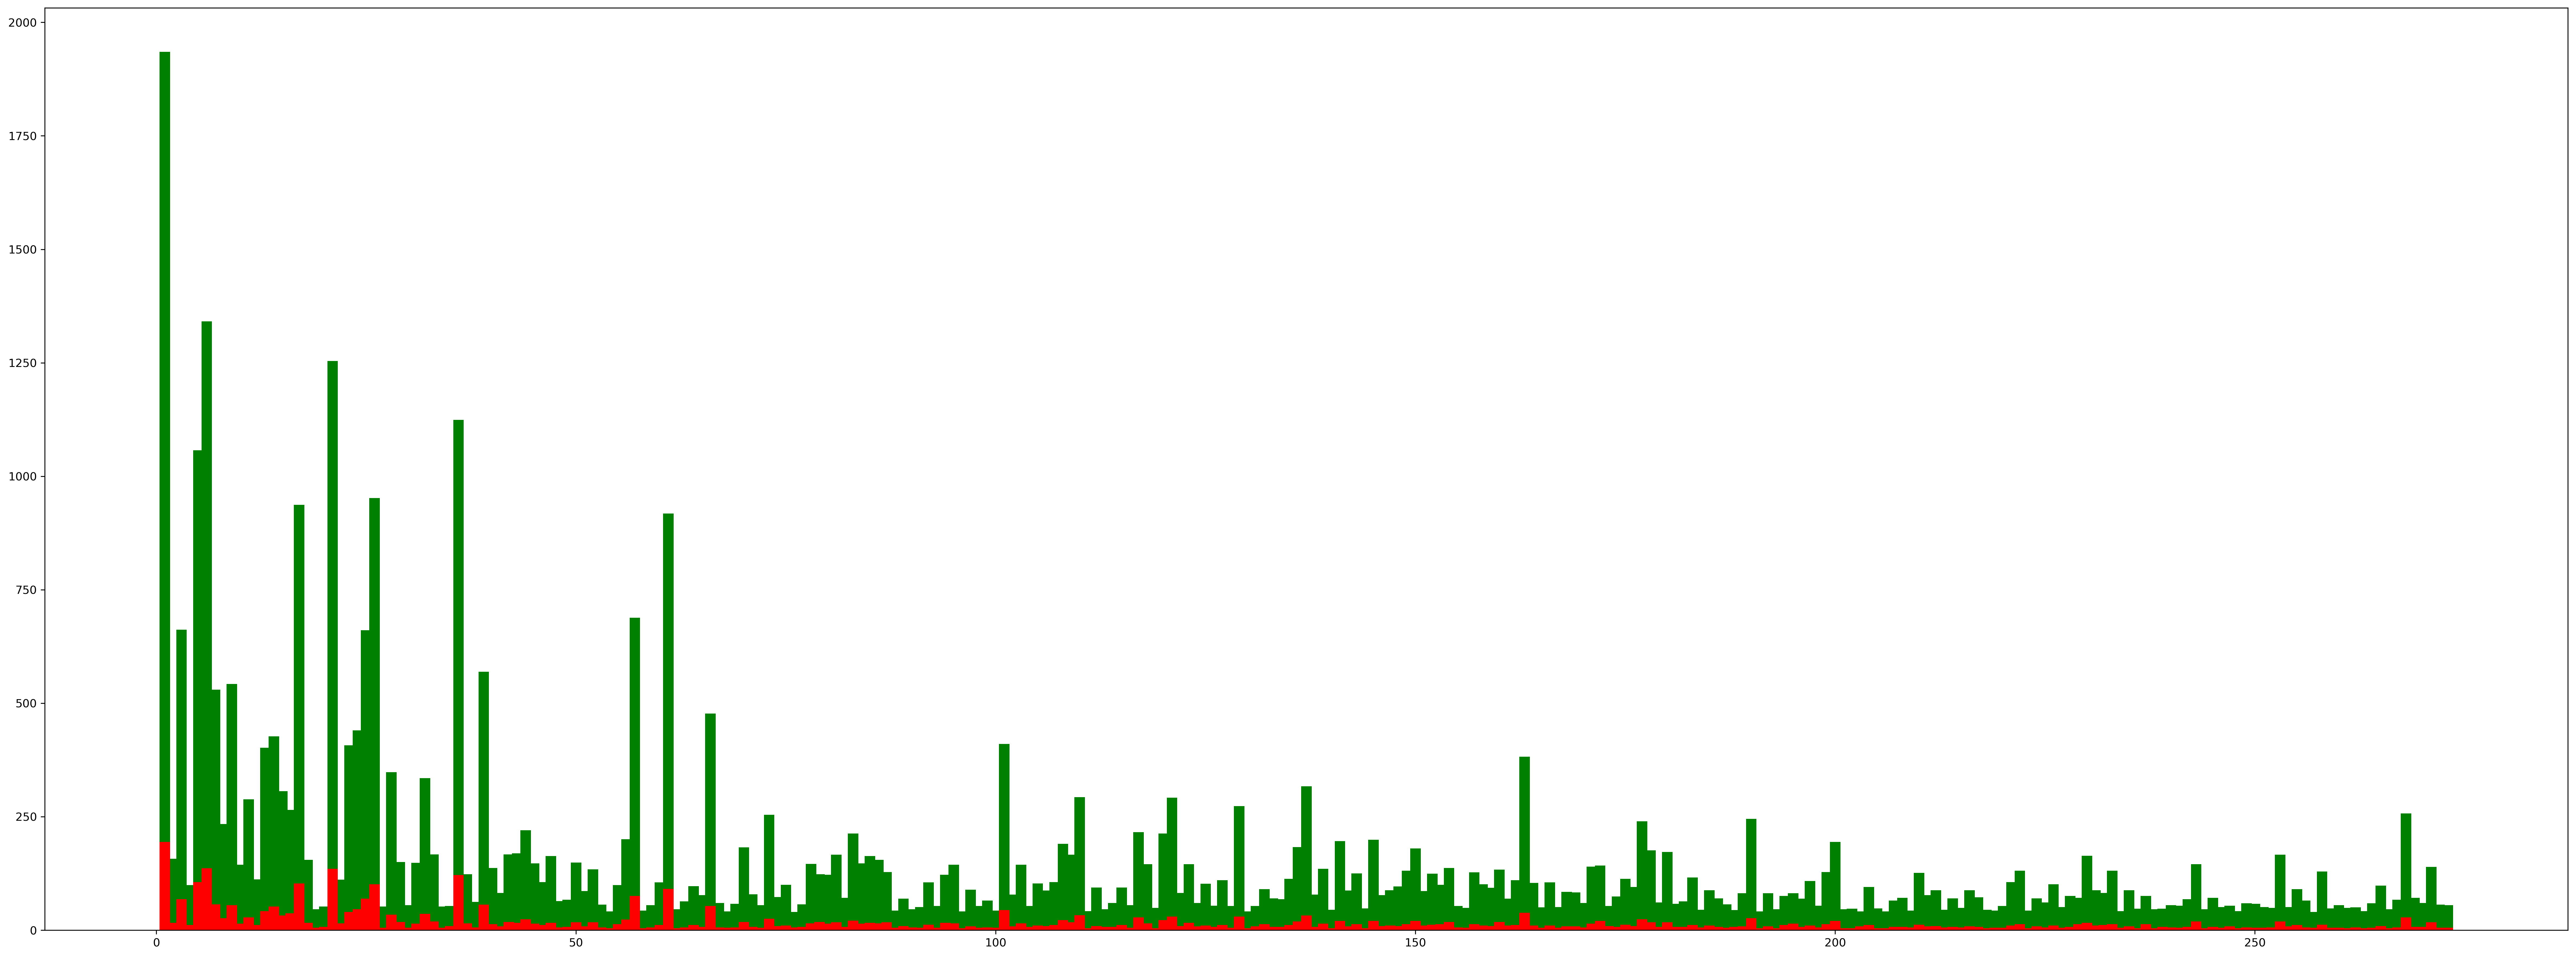

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,15))
plt.bar(count_cats.keys(), count_cats.values(), 1.25, color='g')
plt.bar(val_count_cats.keys(), val_count_cats.values(), 1.25, color='r')
# plt.yscale('log')

In [57]:
new_val_data = val_data.copy()
new_train_data = tr_data.copy()
new_val_data.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [58]:
new_val_data['images'] = []
new_val_data['annotations'] = []
new_train_data['images'] = []
new_train_data['annotations'] = []

images_info = all_images.copy()

for img_key in best:
    curr_data = images_info.pop(img_key)
    new_val_data['images'].append(curr_data['image_info'])
    for ann in curr_data['annotations']:
        new_val_data['annotations'].append(ann)

print(len(images_info.keys()))

for train_img_key in images_info.keys():
    curr_data = images_info[train_img_key]
    new_train_data['images'].append(curr_data['image_info'])
    for ann in curr_data['annotations']:
        new_train_data['annotations'].append(ann)


22790


In [59]:
len(new_val_data['images']),len(new_train_data['images'])

(2599, 22790)

In [60]:
old_root = Path('/home/marcosmejia/UB/food_dataset')
new_root = Path('/home/marcosmejia/UB/AICrowd_newval')

tr_original_folder = old_root / 'train-v0.4/train/images'
val_original_folder = old_root / 'val-v0.4/val/images'

new_tr_folder = new_root / 'train/images'
new_val_folder = new_root / 'val/images'

tr_original_folder,val_original_folder,new_tr_folder,new_val_folder

(PosixPath('/home/marcosmejia/UB/food_dataset/train-v0.4/train/images'),
 PosixPath('/home/marcosmejia/UB/food_dataset/val-v0.4/val/images'),
 PosixPath('/home/marcosmejia/UB/AICrowd_newval/train/images'),
 PosixPath('/home/marcosmejia/UB/AICrowd_newval/val/images'))

In [61]:
len(new_val_data['images'])

2599

In [64]:
new_train_data['images'][0]

{'id': 81931, 'file_name': '081931.jpg', 'width': 650, 'height': 650}

In [66]:
from shutil import copyfile

for image in new_val_data['images']:
    
    try:
        copyfile(tr_original_folder / image['file_name'] , new_val_folder / image['file_name'])
    except:
        print('trying on val_folder')
        copyfile(val_original_folder / image['file_name'] , new_val_folder / image['file_name'])

for image in new_train_data['images']:
    
    try:
        copyfile(tr_original_folder / image['file_name'] , new_tr_folder / image['file_name'])
    except:
        copyfile(val_original_folder / image['file_name'] , new_tr_folder / image['file_name'])    
        

trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val_folder
trying on val

In [67]:
new_tr_original_ann =  new_tr_folder.parents[0] / 'annotations.json'
new_val_original_ann = new_val_folder.parents[0] / 'annotations.json'

new_tr_original_ann,new_val_original_ann

(PosixPath('/home/marcosmejia/UB/AICrowd_newval/train/annotations.json'),
 PosixPath('/home/marcosmejia/UB/AICrowd_newval/val/annotations.json'))

In [68]:
with open(new_tr_original_ann,'w') as f:
    json.dump(new_train_data,f)

with open(new_val_original_ann,'w') as f:
    json.dump(new_val_data,f)

In [42]:
def map_ids(input_filename,output_filename = None, cat_map=None):  
    input_filename = Path(input_filename)  
    if output_filename is None:
        output_filename = input_filename
    else:
        output_filename = Path(output_filename)

    with open(input_filename,'r') as f:
        json_data = json.load(f)
    
    #categories mapping
    if cat_map is None:
        cat_map = {}
        id_num = 1
        for cat_info in json_data['categories']:
            if cat_info['id'] not in cat_map.keys():
                cat_map[cat_info['id']] = id_num
                id_num+=1
        
        cat_json = output_filename.parents[0] / 'cat_mapping.json'
        with open(cat_json,'w') as f:
            json.dump(cat_map, f)
    else:
        with open(cat_map,'r') as f:
            cat_map = json.load(f)
        cat_map = {value:key for key,value in cat_map.items()}    
    for cat_info in json_data['categories']:

        cat_info['id'] =  cat_map[cat_info['id']]

    for annotation in json_data['annotations']:
        annotation['category_id'] = cat_map[annotation['category_id']]

    with open(output_filename,'w') as f:
        json.dump(json_data, f)

    return output_filename 

In [69]:
new_tr_original_ann.parents[0] 

PosixPath('/home/marcosmejia/UB/AICrowd_newval/train/new_annotations_mapped.json')

In [70]:
map_ids(new_tr_original_ann,
        new_tr_original_ann.parents[0] / 'new_annotations_mapped.json' , 
        '/home/marcosmejia/UB/food_dataset/val-v0.4/val/cat_mapping.json')

map_ids(new_val_original_ann,
        new_val_original_ann.parents[0] / 'new_annotations_mapped.json' , 
        '/home/marcosmejia/UB/food_dataset/val-v0.4/val/cat_mapping.json')

PosixPath('/home/marcosmejia/UB/AICrowd_newval/val/new_annotations_mapped.json')

In [71]:
coco = COCO(new_tr_original_ann)

loading annotations into memory...
Done (t=0.93s)
creating index...
index created!


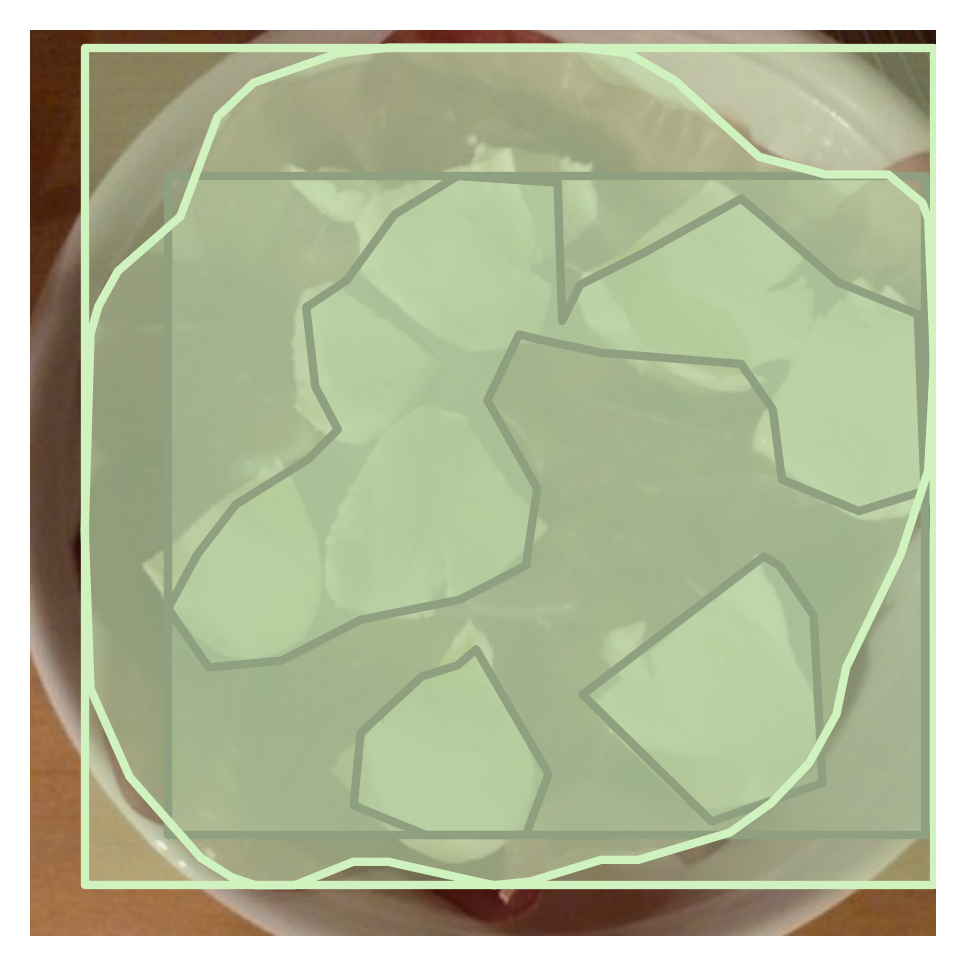

In [75]:
# Select a random image:
random_image_id = random.choice(coco.getImgIds())
img = coco.loadImgs(random_image_id)[0]
# Show image 
image_path = os.path.join(new_tr_original_ann.parents[0], 'images', img["file_name"])
I = io.imread(image_path)

annotation_ids = coco.getAnnIds(imgIds=img['id'])
annotations = coco.loadAnns(annotation_ids)

plt.imshow(I); plt.axis('off')
# Render annotations on top of the image
coco.showAnns(annotations,draw_bbox=True )